Cheng Shi; USCID: 8556138235; Github:CaronShi


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

(a) randomly select 70%

In [2]:
df = pd.read_csv("../Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
x = df.iloc[:, :22]
y = df.iloc[:, 22:-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print(y_train.shape,df.shape)

(5036, 3) (7195, 26)


(b)Each instance has three labels: Families, Genus, and Species. 

Each of the labelshas multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train aclassifier for each label (binary relevance). We first try this approach

i.Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

reference: https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

The exact match score: is the sum of all of the individual exact match scores in the set, divided by the total number of predictions in the set. 

The exact match 0/1 loss: calculates proportions of instances whose actual value is not equal to predicted value. 

Hamming score: is the number of correct predictions divided by total number of predictions

Hamming loss: takes into account the prediction error (an incorrect label is predicted) and missing error (a relevant label not predicted), normalized over total number of classes and total number of examples.

i.Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to tryto solve the problem with both standardized and raw attributes and reportthe results.

In [3]:
#SVM for label 1 
#SVM for label 2
#SVM for label 3

def SVM_model(xtrain,ytrain):
    c =np.logspace(-3,6,5)
    gamma = np.linspace(0.1,2,5)
    param_grid = {'C':c,'gamma': gamma}
    svc = SVC()
    clf = GridSearchCV(svc, param_grid,cv=10)
    clf.fit(xtrain,ytrain)
    return clf

In [4]:
#Family
clf = SVM_model(x_train,y_train["Family"])
#find best c and gamma
best_para = clf.best_params_
bestg = best_para['gamma']
bestc = best_para['C']
#use best c and gamma fit svc model and predict y
svm_best = SVC(kernel="rbf", C=bestc, gamma=bestg).fit(x_train,y_train["Family"])
best_score = clf.best_score_
y_predict = svm_best.predict(x_test)
print("best_parameters:", best_para, "score:",best_score)
print("predict:",y_predict)

best_parameters: {'C': 31.622776601683793, 'gamma': 2.0} score: 0.9932488402915839
predict: ['Leptodactylidae' 'Hylidae' 'Hylidae' ... 'Leptodactylidae'
 'Leptodactylidae' 'Leptodactylidae']


In [5]:
#Genus
clf = SVM_model(x_train,y_train["Genus"])
#find best c and gamma
best_para = clf.best_params_
bestg = best_para['gamma']
bestc = best_para['C']
#use best c and gamma fit svc model and predict y
svm_best = SVC(kernel="rbf", C=bestc, gamma=bestg).fit(x_train,y_train["Genus"])
best_score = clf.best_score_
y_predict_Genus = svm_best.predict(x_test)
print("best_parameters:", best_para, "score:",best_score)
print("predict:",y_predict_Genus)

best_parameters: {'C': 31.622776601683793, 'gamma': 1.525} score: 0.9908647322414719
predict: ['Adenomera' 'Hypsiboas' 'Hypsiboas' ... 'Adenomera' 'Adenomera'
 'Adenomera']


In [6]:
##Species
clf = SVM_model(x_train,y_train["Species"])
#find best c and gamma
best_para = clf.best_params_
bestg = best_para['gamma']
bestc = best_para['C']
#use best c and gamma fit svc model and predict y
svm_best = SVC(kernel="rbf", C=bestc, gamma=bestg).fit(x_train,y_train["Species"])
best_score = clf.best_score_
y_predict_Species = svm_best.predict(x_test)
print("best_parameters:", best_para, "score:",best_score)
print("predict:",y_predict_Species)

best_parameters: {'C': 31.622776601683793, 'gamma': 1.525} score: 0.9902687052289437
predict: ['AdenomeraHylaedactylus' 'HypsiboasCinerascens' 'HypsiboasCordobae' ...
 'AdenomeraHylaedactylus' 'AdenomeraHylaedactylus'
 'AdenomeraHylaedactylus']


In [7]:
d ={"Family":y_predict, "Genus":y_predict_Genus,"Species":y_predict_Species}
df_y_predict= pd.DataFrame(data=d)
df_y_predict

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2154,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2155,Leptodactylidae,Adenomera,AdenomeraAndre
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


In [18]:
y_test.drop('index',axis=1)

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2154,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2155,Leptodactylidae,Adenomera,AdenomeraAndre
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


In [68]:
def hamming_match(y_test,df_y_predict):
    hamming = 0
    exact_match = 0

    for index in range(len(y_test)):
        if df_y_predict['Family'][index] == y_test['Family'][index] and df_y_predict['Genus'][index] == y_test['Genus'][index] and df_y_predict['Species'][index] == y_test['Species'][index]:   
            exact_match +=1
            hamming += 3 
        elif df_y_predict['Family'][index] == y_test['Family'][index] or df_y_predict['Genus'][index] == y_test['Genus'][index] or df_y_predict['Species'][index] == y_test['Species'][index]:
            hamming+=1
    hamming_loss = 1- (hamming/(len(y_test)*3))
    return hamming_loss, exact_match/len(y_test)
    
hamming_loss, exact_match =hamming_match(y_test,df_y_predict)
print('hamming loss:', hamming_loss, 'exact match:',exact_match)

hamming loss: 0.008182800679326863 exact match: 0.9898100972672533


ii.Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize4the at-tributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [47]:
#data standardize
x_train_scaler = StandardScaler().fit(x_train).transform(x_train)
x_test_scaler = StandardScaler().fit(x_test).transform(x_test)
#build model
def SVM_L1(xtrain,ytrain):
    c =np.logspace(-3,6,5)
    param_grid = {'C':c}
    svc = LinearSVC(penalty='l1',dual=False, random_state=42)
    clf = GridSearchCV(estimator=svc, param_grid=param_grid , cv=10)
    clf.fit(x_train,ytrain)
    return clf

In [139]:
import warnings
warnings.filterwarnings('ignore')
#Family
clf = SVM_L1(x_train_scaler,y_train["Family"])
#find best c 
best_para = clf.best_params_
bestc = best_para['C']
#use best c fit svc model and predict y
svm_best = SVC(kernel="rbf", C=bestc).fit(x_train_scaler,y_train["Family"])
best_score = clf.best_score_
y_predict_l1 = svm_best.predict(x_test_scaler)
print("best_parameters:", best_para, "score:",best_score)
print("predict:",y_predict_l1)

best_parameters: {'C': 5623.413251903491} score: 0.9408280475874911
predict: ['Leptodactylidae' 'Hylidae' 'Hylidae' ... 'Leptodactylidae'
 'Leptodactylidae' 'Leptodactylidae']


In [140]:
#Genus
clf = SVM_L1(x_train_scaler,y_train["Genus"])
#find best c 
best_para = clf.best_params_
bestc = best_para['C']
#use best c  fit svc model and predict y
svm_best = SVC(kernel="rbf", C=bestc).fit(x_train_scaler,y_train["Genus"])
best_score = clf.best_score_
y_predict_Genus_l1 = svm_best.predict(x_test_scaler)
print("best_parameters:", best_para, "score:",best_score)
print("predict:",y_predict_Genus_l1)

best_parameters: {'C': 31.622776601683793} score: 0.951351809776263
predict: ['Adenomera' 'Hypsiboas' 'Hypsiboas' ... 'Adenomera' 'Adenomera'
 'Adenomera']


In [141]:
#Species
clf = SVM_L1(x_train_scaler,y_train["Species"])
#find best c
best_para = clf.best_params_
bestc = best_para['C']
#use best c  fit svc model and predict y
svm_best = SVC(kernel="rbf", C=bestc).fit(x_train_scaler,y_train["Species"])
best_score = clf.best_score_
y_predict_Species_l1 = svm_best.predict(x_test_scaler)
print("best_parameters:", best_para, "score:",best_score)
print("predict:",y_predict_Species_l1)

best_parameters: {'C': 31.622776601683793} score: 0.9588950424437502
predict: ['AdenomeraHylaedactylus' 'HypsiboasCinerascens' 'HypsiboasCordobae' ...
 'AdenomeraHylaedactylus' 'AdenomeraHylaedactylus'
 'AdenomeraHylaedactylus']


In [145]:
d ={"Family":y_predict_l1, "Genus":y_predict_Genus_l1,"Species":y_predict_Species_l1}
df_y_predict_l1= pd.DataFrame(data=d)
df_y_predict_l1

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2154,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2155,Leptodactylidae,Adenomera,AdenomeraAndre
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


In [153]:
hamming = 0
exact_match = 0

for index in range(len(y_test)):
    if df_y_predict_l1['Family'][index] == y_test['Family'][index] and df_y_predict_l1['Genus'][index] == y_test['Genus'][index] and df_y_predict_l1['Species'][index] == y_test['Species'][index]:   
        exact_match +=1
        hamming += 3 
    elif df_y_predict_l1['Family'][index] == y_test['Family'][index] or df_y_predict_l1['Genus'][index] == y_test['Genus'][index] or df_y_predict_l1['Species'][index] == y_test['Species'][index]:
        hamming+=1
hamming_loss_l1 = 1- (hamming/(len(y_test)*3))
exact_match_l1 =exact_match/len(y_test)
print('hamming loss (L1 penalty):', hamming_loss_l1, 'exact match(L1 penalty):',exact_match_l1)

hamming loss (L1 penalty): 0.010344295198394304 exact match(L1 penalty): 0.9865678554886521


iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [147]:
from imblearn.over_sampling import SMOTE
x_train_SMOTE_family, y_train_SMOTE_family = SMOTE().fit_resample(x_train_scaler, y_train["Family"])
x_train_SMOTE_genus, y_train_SMOTE_genus = SMOTE().fit_resample(x_train_scaler, y_train["Genus"])
x_train_SMOTE_species, y_train_SMOTE_species = SMOTE().fit_resample(x_train_scaler, y_train["Species"])
#Specis
c =np.logspace(-3,6,5)
param_grid = {'C':c}
svc = LinearSVC(penalty='l1',dual=False, random_state=42)
clf = GridSearchCV(estimator=svc, param_grid=param_grid , cv=10)
clf.fit(x_train_SMOTE_species, y_train_SMOTE_species)
#find best c
best_para = clf.best_params_
bestc = best_para['C']
#use best c  fit svc model and predict y
svm_best = SVC(kernel="rbf", C=bestc).fit(x_train_SMOTE_species, y_train_SMOTE_species)
best_score = clf.best_score_
y_predict_s_l1 = svm_best.predict(x_test_scaler)
print("best_parameters:", best_para, "score:",best_score)
print("predict:",y_predict_s_l1)


best_parameters: {'C': 31.622776601683793} score: 0.9620760114425828
predict: ['AdenomeraHylaedactylus' 'HypsiboasCinerascens' 'HypsiboasCordobae' ...
 'AdenomeraHylaedactylus' 'AdenomeraHylaedactylus'
 'AdenomeraHylaedactylus']


In [155]:
#family 
clf.fit(x_train_SMOTE_family, y_train_SMOTE_family)
#find best c
best_para = clf.best_params_
bestc = best_para['C']
#use best c  fit svc model and predict y
svm_best = SVC(kernel="rbf", C=bestc).fit(x_train_SMOTE_family, y_train_SMOTE_family)
best_score = clf.best_score_
y_predict_family_l1 = svm_best.predict(x_test_scaler)
print("best_parameters:", best_para, "score:",best_score)
print("predict:",y_predict_family_l1)

best_parameters: {'C': 31.622776601683793} score: 0.9515142193732758
predict: ['Leptodactylidae' 'Hylidae' 'Hylidae' ... 'Leptodactylidae'
 'Leptodactylidae' 'Leptodactylidae']


In [156]:
x_train_SMOTE_genus, y_train_SMOTE_genus
#family 
clf.fit(x_train_SMOTE_genus, y_train_SMOTE_genus)
#find best c
best_para = clf.best_params_
bestc = best_para['C']
#use best c  fit svc model and predict y
svm_best = SVC(kernel="rbf", C=bestc).fit(x_train_SMOTE_genus, y_train_SMOTE_genus)
best_score = clf.best_score_
y_predict_g_l1 = svm_best.predict(x_test_scaler)
print("best_parameters:", best_para, "score:",best_score)
print("predict:",y_predict_g_l1)

best_parameters: {'C': 31.622776601683793} score: 0.9584777363905369
predict: ['Adenomera' 'Hypsiboas' 'Hypsiboas' ... 'Adenomera' 'Adenomera'
 'Adenomera']


In [157]:
d ={"Family":y_predict_family_l1, "Genus":y_predict_g_l1,"Species":y_predict_s_l1}
df_y_predict_sm= pd.DataFrame(data=d)
df_y_predict_sm

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2154,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2155,Leptodactylidae,Adenomera,AdenomeraAndre
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


In [160]:
hamming_loss_sm, exact_match_sm =hamming_match(y_test,df_y_predict_sm)
print("hamming loss(smote):", hamming_loss_sm, "exact match(smote):", exact_match_sm)

hamming loss(smote): 0.009109155473212893 exact match(smote): 0.9879573876794813


In [161]:
conclusion =pd.DataFrame()
conclusion['hamming loss'] = [hamming_loss,hamming_loss_l1,hamming_loss_sm]
conclusion['exact match'] = [exact_match,exact_match_l1,exact_match_sm]
conclusion.index = ['Gaussian', 'L1','SMOTE L1']
conclusion

,hamming loss,exact match
Gaussian,0.219083,2130.000000
L1,0.010344,0.986568
SMOTE L1,0.009109,0.987957


Conclusion ANS: From the result above, we could see that SVM with Gaussian Kernal has the lowest hamming loss and highest exact match comparing with the others. The second place is theL1-penalized SVMs (SMOTE) which's  hamming loss and exact match both improve from the original L1-penalized SVMs by resampling.  

2.K-Means Clustering on a Multi-Class and Multi-Label Data Set 

Monte-Carlo Simulation:Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

(a)Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not splitthe data into train and test, as we are not performing supervised learning in thisexercise). Choose k∈ {1,2, . . . ,50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [177]:
x = df.iloc[:, :22]
y = df.iloc[:, 22:-1]

In [180]:
from sklearn.metrics import silhouette_score
#for k in range(2,51):
x = df.iloc[:, :22]
y = df.iloc[:, 22:-1]
find_best = []
for k in range(2, 51):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(x)
    score = silhouette_score(x, kmeans.labels_)
    find_best.append([score,k])
sort_find = find_best.sort()

In [181]:
print("best score:",find_best[-1][0],"best k:",find_best[-1][1])

best score: 0.3787509343305295 best k: 4


(b)In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [230]:
from collections import defaultdict
from collections import Counter
kmeans = KMeans(n_clusters = 4, random_state = 42).fit(x)
c1,c2,c3,c0=[],[],[],[]
cluster = kmeans.labels_
y_fam  = y.copy()
y_fam['cluster'] = cluster
for index, row  in y_fam.iterrows():
    if row['cluster'] == 0:
        c0.append(row['Family'])
    elif row['cluster'] == 1:
        c1.append(row['Family'])
    elif row['cluster'] == 2:
        c2.append(row['Family'])
    elif row['cluster'] == 3:
        c3.append(row['Family'])
c0_c,c1_c,c2_c,c3_c = Counter(c0),Counter(c1),Counter(c2),Counter(c3)
print(c0_c,c1_c,c2_c,c3_c)

Counter({'Leptodactylidae': 3467, 'Hylidae': 101}) Counter({'Hylidae': 1245, 'Leptodactylidae': 629, 'Bufonidae': 66, 'Dendrobatidae': 42}) Counter({'Hylidae': 590, 'Leptodactylidae': 22, 'Bufonidae': 2}) Counter({'Dendrobatidae': 500, 'Leptodactylidae': 302, 'Hylidae': 229})


In [231]:
#Genus
c1,c2,c3,c0=[],[],[],[]
cluster = kmeans.labels_
y_fam  = y.copy()
y_fam['cluster'] = cluster
for index, row  in y_fam.iterrows():
    if row['cluster'] == 0:
        c0.append(row['Genus'])
    elif row['cluster'] == 1:
        c1.append(row['Genus'])
    elif row['cluster'] == 2:
        c2.append(row['Genus'])
    elif row['cluster'] == 3:
        c3.append(row['Genus'])
c0_c,c1_c,c2_c,c3_c = Counter(c0),Counter(c1),Counter(c2),Counter(c3)
print(c0_c,c1_c,c2_c,c3_c)

Counter({'Adenomera': 3466, 'Dendropsophus': 86, 'Hypsiboas': 12, 'Scinax': 3, 'Leptodactylus': 1}) Counter({'Hypsiboas': 1038, 'Adenomera': 376, 'Leptodactylus': 253, 'Scinax': 96, 'Osteocephalus': 76, 'Rhinella': 66, 'Ameerega': 42, 'Dendropsophus': 35}) Counter({'Hypsiboas': 542, 'Osteocephalus': 38, 'Adenomera': 12, 'Leptodactylus': 10, 'Scinax': 10, 'Rhinella': 2}) Counter({'Ameerega': 500, 'Adenomera': 296, 'Dendropsophus': 189, 'Scinax': 39, 'Leptodactylus': 6, 'Hypsiboas': 1})


In [232]:
#Species
c1,c2,c3,c0=[],[],[],[]
cluster = kmeans.labels_
y_fam  = y.copy()
y_fam['cluster'] = cluster
for index, row  in y_fam.iterrows():
    if row['cluster'] == 0:
        c0.append(row['Species'])
    elif row['cluster'] == 1:
        c1.append(row['Species'])
    elif row['cluster'] == 2:
        c2.append(row['Species'])
    elif row['cluster'] == 3:
        c3.append(row['Species'])
c0_c,c1_c,c2_c,c3_c = Counter(c0),Counter(c1),Counter(c2),Counter(c3)
print(c0_c,c1_c,c2_c,c3_c)

Counter({'AdenomeraHylaedactylus': 3466, 'HylaMinuta': 86, 'HypsiboasCordobae': 12, 'ScinaxRuber': 3, 'LeptodactylusFuscus': 1}) Counter({'HypsiboasCordobae': 1018, 'AdenomeraAndre': 370, 'LeptodactylusFuscus': 253, 'ScinaxRuber': 96, 'OsteocephalusOophagus': 76, 'Rhinellagranulosa': 66, 'Ameeregatrivittata': 42, 'HylaMinuta': 35, 'HypsiboasCinerascens': 20, 'AdenomeraHylaedactylus': 6}) Counter({'HypsiboasCinerascens': 452, 'HypsiboasCordobae': 90, 'OsteocephalusOophagus': 38, 'LeptodactylusFuscus': 10, 'ScinaxRuber': 10, 'AdenomeraAndre': 6, 'AdenomeraHylaedactylus': 6, 'Rhinellagranulosa': 2}) Counter({'Ameeregatrivittata': 500, 'AdenomeraAndre': 296, 'HylaMinuta': 189, 'ScinaxRuber': 39, 'LeptodactylusFuscus': 6, 'HypsiboasCordobae': 1})


In [237]:
s_df = pd.DataFrame()
s_df['Family Majority'] = ['Leptodactylidae', 'Hylidae','Hylidae','Dendrobatidae']
s_df['Genus Majority'] =['Adenomera','Hypsiboas','Hypsiboas','Ameerega']
s_df['Sepcies Majority'] = ['AdenomeraHylaedactylus','AHypsiboasCinerascen','HypsiboasCinerascens','Ameeregatrivittata' ]

#s_df.index=['cluster 0','cluster 1','cluster 2','cluster 3']

s_df

,Family Majority,Genus Majority,Sepcies Majority
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,AHypsiboasCinerascen
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


(c)Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [269]:
#hamming_dis
#hamming_score
#hamming_loss
cluster = kmeans.labels_

def findhamming(label,i):
    hamming = 0
    dist = 0
    for index,row in y_fam.iterrows():
        if row['cluster'] == 0:
            if row[label] != s_df.loc[0][i]:
                hamming+=1 

        elif row['cluster'] == 1:
            if row[label] != s_df.loc[1][i]:
                hamming+=1 

        elif row['cluster'] == 2:
            if row[label] != s_df.loc[2][i]:
                hamming+=1 

        elif row['cluster'] == 3:
            if row[label] != s_df.loc[3][i]:
                hamming+=1 

    return hamming

h_f = findhamming('Family',0)

h_g = findhamming('Genus',1)

h_s = findhamming('Species',2)
print(h_f,h_g,h_s)

1393 1649 2777


In [282]:
hamming = h_f+h_g+h_s
hamming_score = hamming / (len(y_fam)*3)
hamming_loss = 1 - hamming_score
dist = hamming/len(y_fam)

print('hamming score:',hamming_score,'hamming loss:',hamming_loss, 'hamming distance:',dist)

hamming score: 0.26958536020384527 hamming loss: 0.7304146397961547 hamming distance: 0.8087560806115358


ISLR 12.6.2

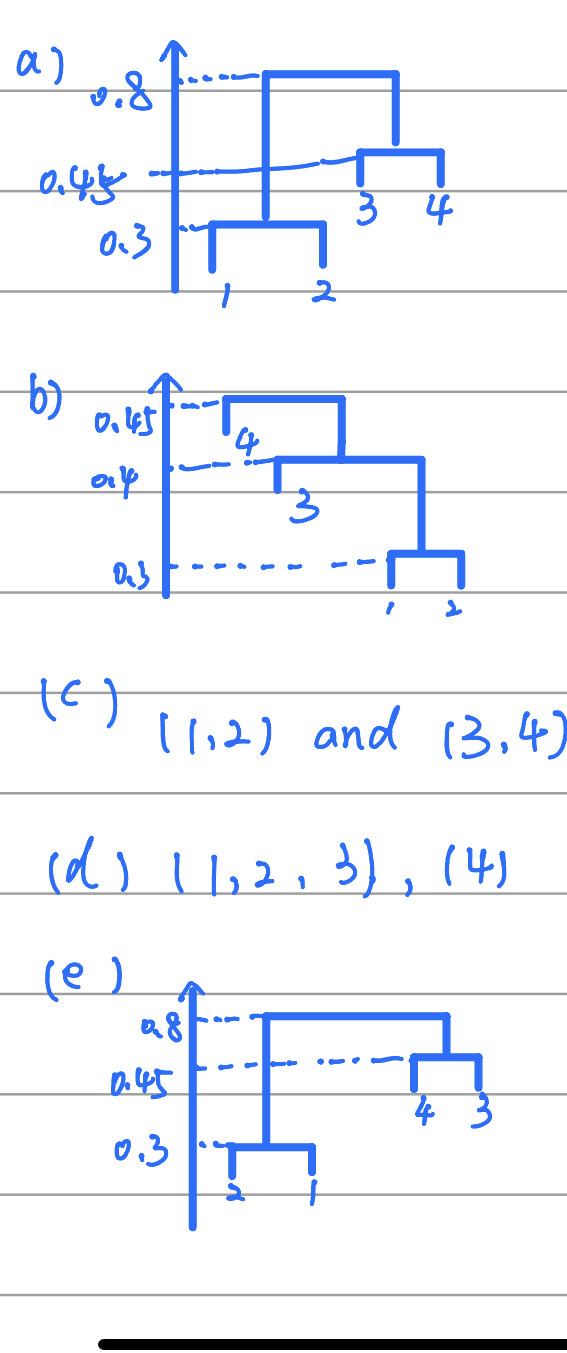